In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("data\PoductDemand.csv")
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [9]:
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [11]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [12]:
df.shape

(150149, 5)

In [15]:
df.set_index('ID', inplace=True)
df

,Store ID,Total Price,Base Price,Units Sold
ID,,,,
1,8091,99.0375,111.8625,20
2,8091,99.0375,99.0375,28
3,8091,133.9500,133.9500,19
4,8091,133.9500,133.9500,44
5,8091,141.0750,141.0750,52
...,...,...,...,...
212638,9984,235.8375,235.8375,38
212639,9984,235.8375,235.8375,30
212642,9984,357.6750,483.7875,31


<Figure size 1000x800 with 0 Axes>

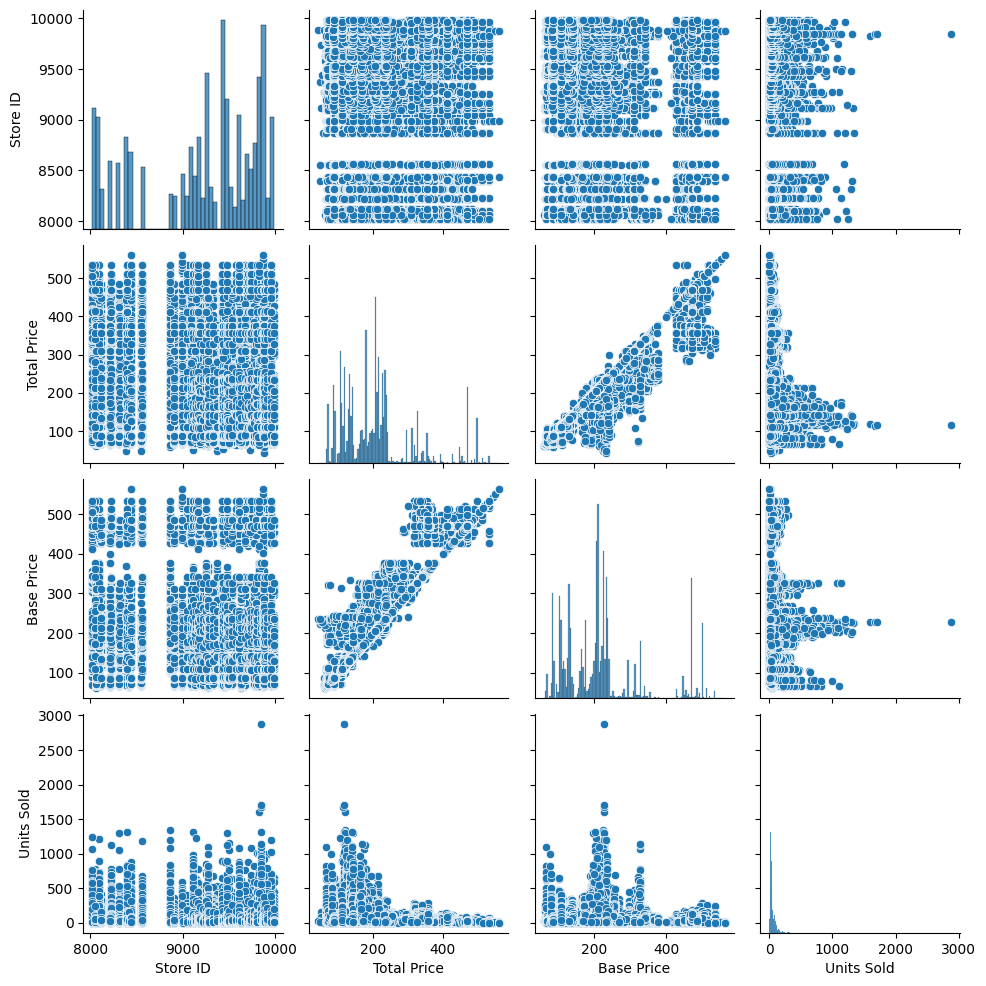

In [16]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

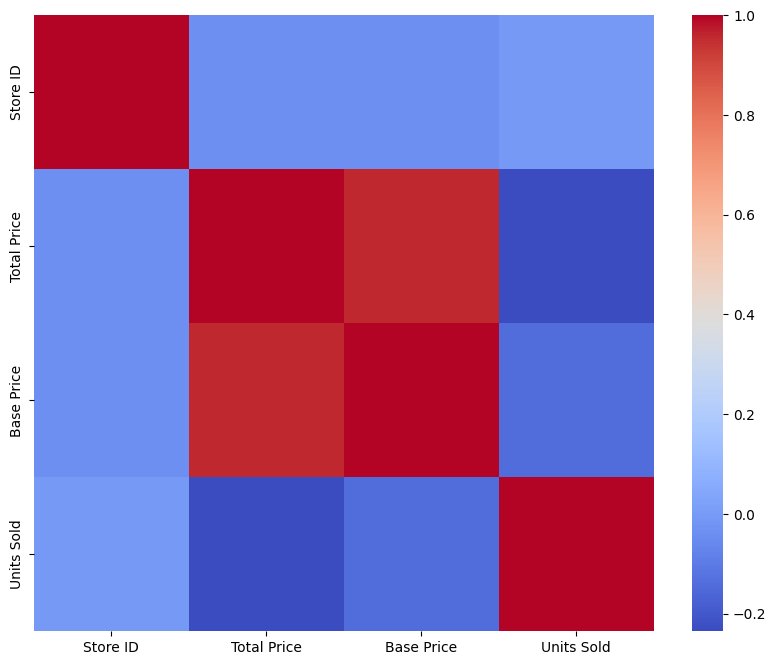

In [18]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

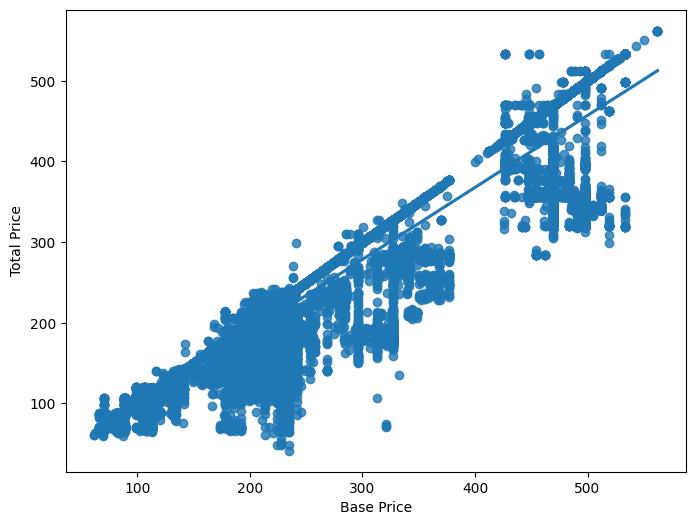

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(x='Base Price',y='Total Price', data=df)
plt.title("To show that there was unwanted correlation/dependence between two independent features")
plt.show()

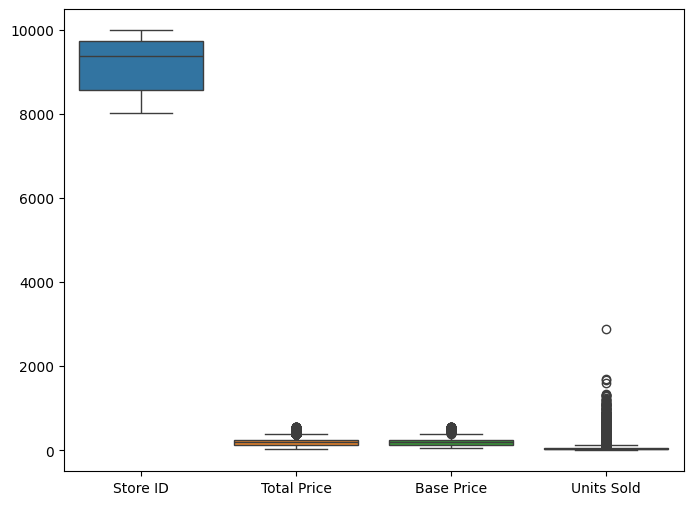

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.show()

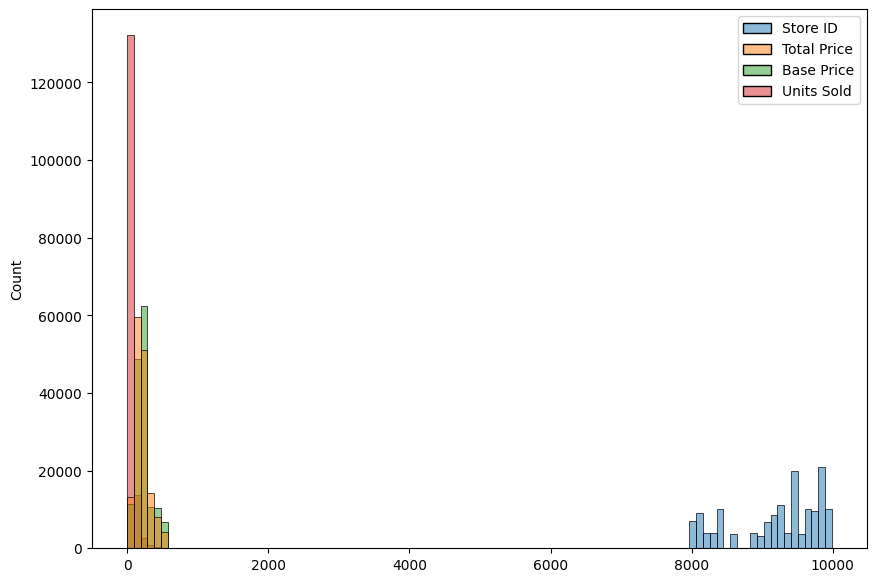

In [40]:
plt.figure(figsize=(10,7))
sns.histplot(df)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,Store ID,Total Price,Base Price,Units Sold
0,-1.80058,-1.041440,-0.969376,-0.526087
1,-1.80058,-1.041440,-1.084958,-0.393214
2,-1.80058,-0.703495,-0.770317,-0.542697
3,-1.80058,-0.703495,-0.770317,-0.127468
4,-1.80058,-0.634526,-0.706105,0.005406


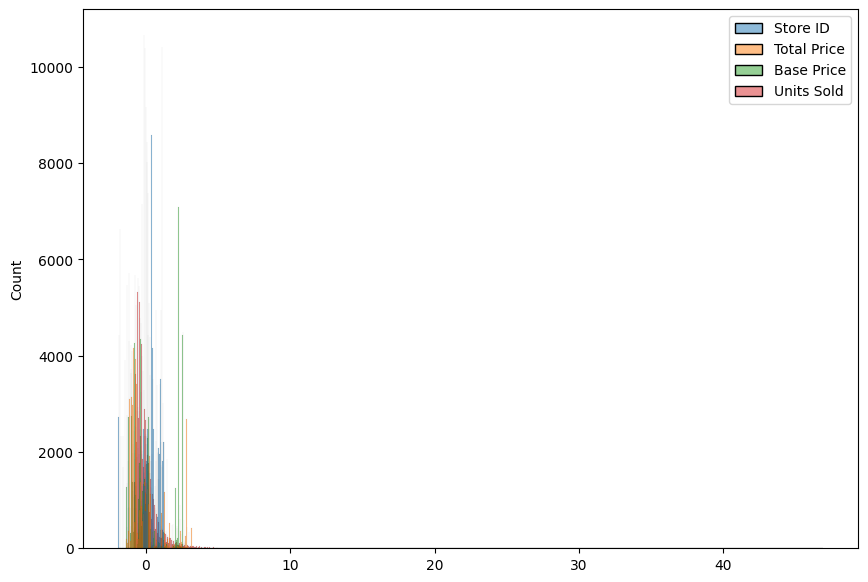

In [47]:
plt.figure(figsize=(10, 7))
sns.histplot(scaled_df)
plt.show()

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df.drop(columns=['Units Sold'])), columns=["Component1", "Component2"])
pca_df.head()

,Component1,Component2
0,1106.828150,-163.223133
1,1106.732699,-172.622400
2,1107.231251,-123.285369
3,1107.231251,-123.285369
4,1107.332996,-113.216587


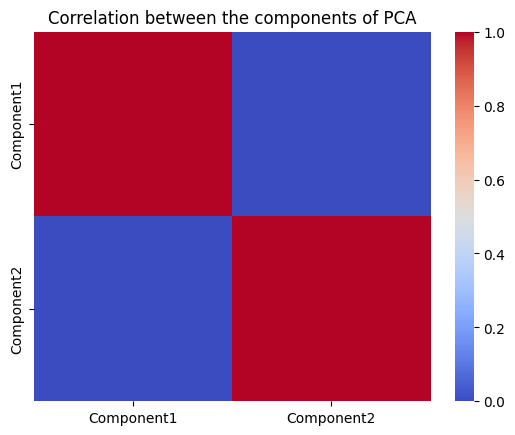

In [31]:
pca_corr = pca_df.corr()
sns.heatmap(pca_corr, cmap='coolwarm')
plt.title("Correlation between the components of PCA")
plt.show()

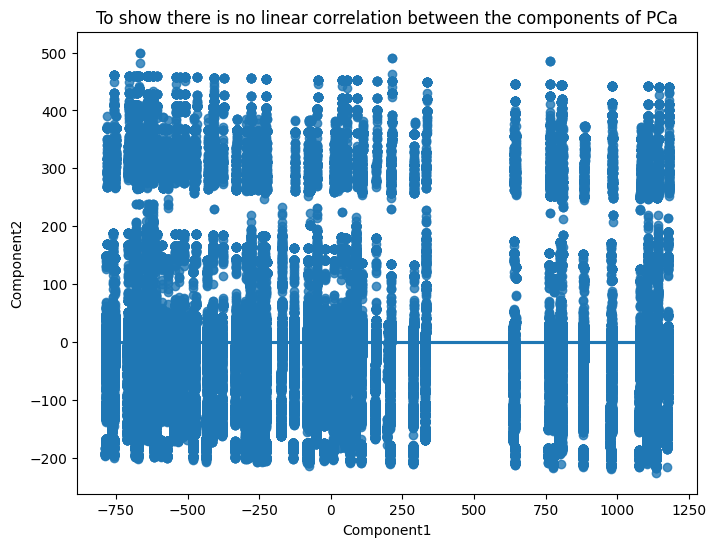

In [33]:
plt.figure(figsize=(8, 6))
sns.regplot(x="Component1", y="Component2", data=pca_df)
plt.title("To show there is no linear correlation between the components of PCA")
plt.show()

In [36]:
pca_df.describe()

,Component1,Component2
count,1.501490e+05,1.501490e+05
mean,-1.040883e-13,1.603968e-14
std,6.156228e+02,1.499278e+02
min,-7.866081e+02,-2.262699e+02
25%,-5.315556e+02,-1.149133e+02
50%,-1.730493e+02,-1.473680e+01
75%,6.358422e+02,2.963589e+01
max,1.180936e+03,4.998480e+02


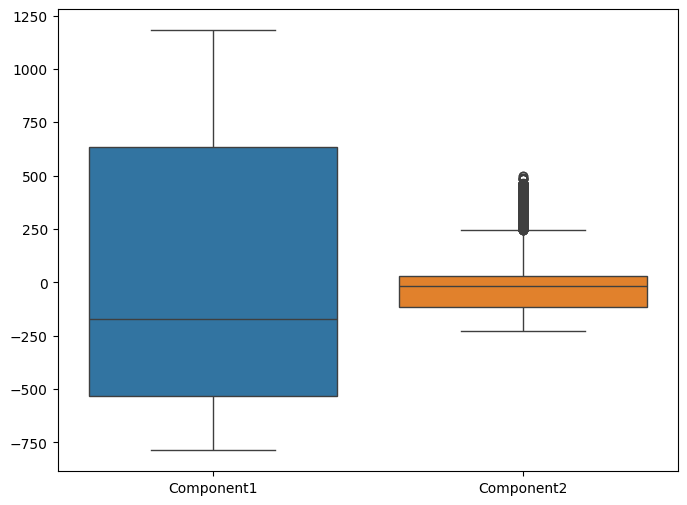

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(pca_df)
plt.show()

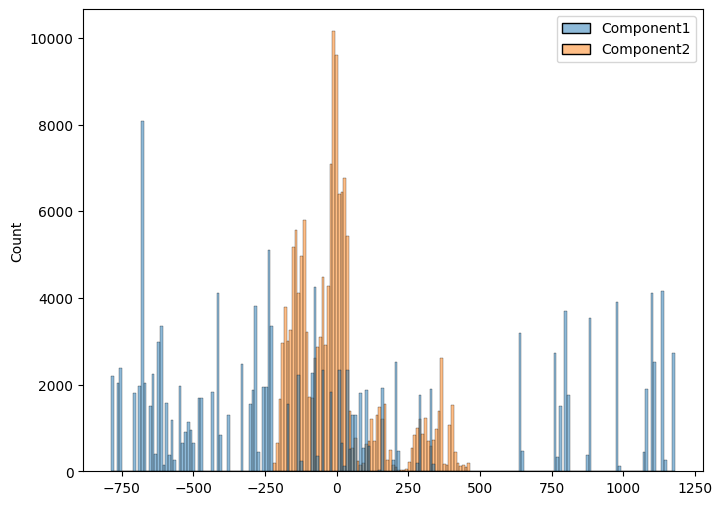

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(pca_df)
plt.show()

In [48]:
scaler2 = StandardScaler()
scaled_pca = pd.DataFrame(scaler2.fit_transform(pca_df), columns=pca_df.columns)
scaled_pca.head()

,Component1,Component2
0,1.797906,-1.088682
1,1.797751,-1.151374
2,1.798561,-0.822301
3,1.798561,-0.822301
4,1.798726,-0.755143


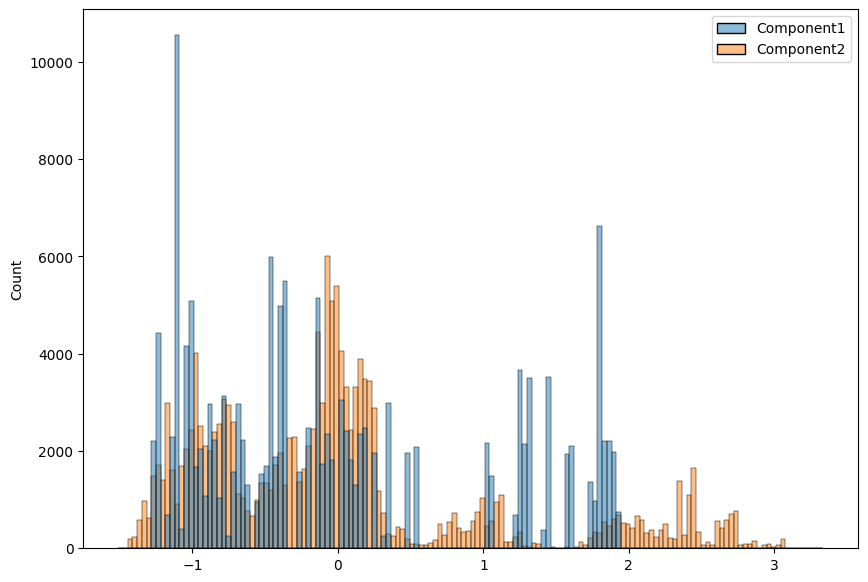

In [49]:
plt.figure(figsize=(10, 7))
sns.histplot(scaled_pca)
plt.show()

In [28]:
pca_df.isna().count()

Component1    150149
Component2    150149
dtype: int64

In [23]:
X = pca_df
y = df['Units Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print([i.shape for i in (X_train, X_test, y_train, y_test)])

[(120119, 2), (30030, 2), (120119,), (30030,)]


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred[:5] , y_test.head()

(array([51.99899519, 53.66290696, 55.97536438, 20.90461258, 48.89847406]),
 ID
 205013     41
 156        13
 109529    339
 88016      14
 203766      4
 Name: Units Sold, dtype: int64)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mse, mae = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
print(f"{mse=} and  {mae=}")

mse=3148.7859584953053 and  mae=33.50114903880067
